In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
#from numba import compiler, types
from scipy.integrate import ode

import matplotlib.gridspec as gridspec
from numba import compiler, types

 # Quadratic Integrate and Fire 
 \begin{cases} 
       C \dot{V} = a(V-b)(V-d)-U+I       \\
       \dot{U} = e(f(V-b)-U) \\
       V=m,\space U=U+n, если \space V \geq V_{peak}
   \end{cases}
  
V - мембранный потенциал.  U - (потоки Кальция?). C - мембранная емкость. b - мембранный потенциал покоя. d - мгновенный пороговый потенциал. e - постоянная времени восстановления. n - сумма токов.


In [3]:

def system(t, state, params):
    a, b, C, d, e, f, m, n, vpeak, I  = params 
    v, u = state
    vnew = (a*(v-b)*(v-d)-u+I)/C
    unew = e*(f*(v-b)-u)
    return np.array([vnew, unew])

Text(0.5, 1.0, 'Изменения U')

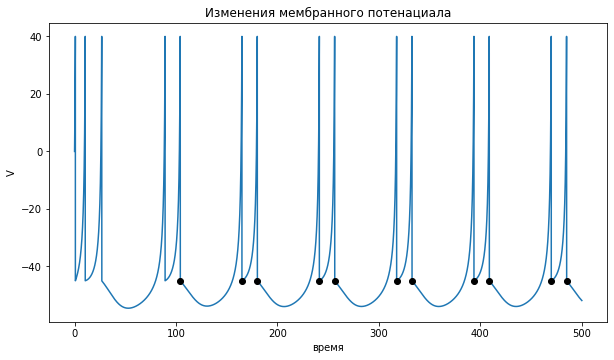

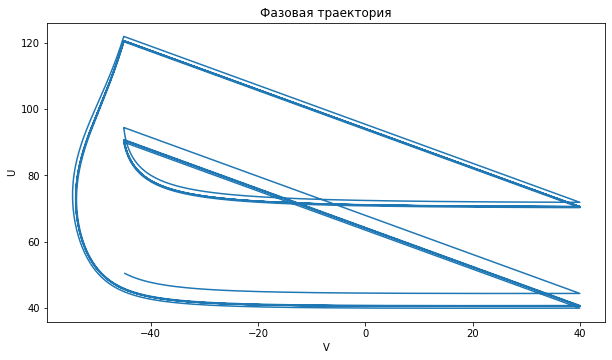

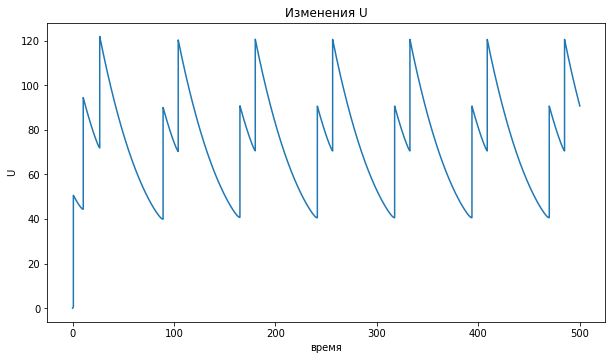

In [4]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -45
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0
h=0.01
prop = ode(system)
prop.set_integrator('dop853')
#prop.set_integrator("dopri5" )
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

prop.set_initial_value(s0, t0)
v_u = np.array([prop.y])
t_values = [0.0]
t_down = []
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    #print(prop.y)
    if(prop.y[0]>=vpeak):
        v_u[-1][0] = vpeak
        prop.set_initial_value([m, prop.y[1]+n], prop.t)
        if(prop.t>100):
            t_down.append(prop.t)
    
    
    v_u = np.append(v_u, [prop.y ], axis = 0  )

plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,0], "-")
plt.xlabel("время")
plt.ylabel("V")

plt.plot(t_down, [m for i in range(len(t_down))], "o", c= "k")
plt.title("Изменения мембранного потенациала")

plt.figure(figsize=(10,5.5))
plt.plot(v_u[100:,0], v_u[100:,1], "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")


plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,1], "-")
plt.xlabel("время")
plt.ylabel("U")
plt.title("Изменения U")


m = m+0.2*np.sin(t) 

Text(0.5, 1.0, 'Изменения U')

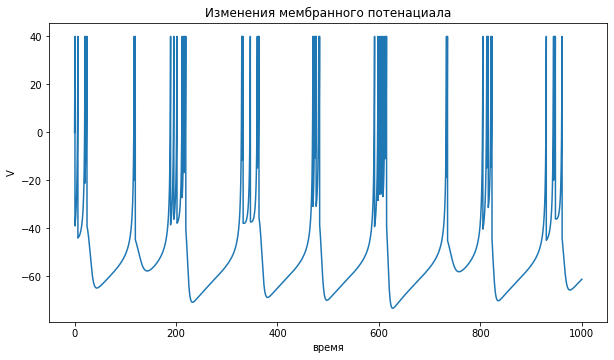

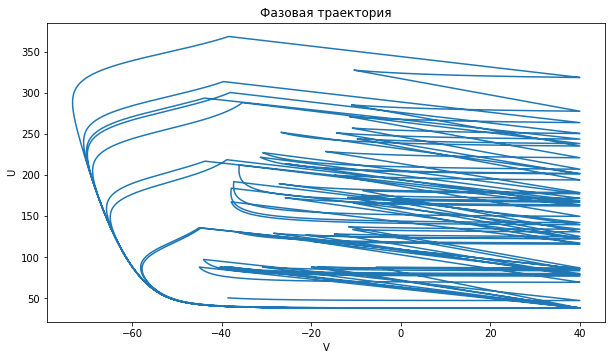

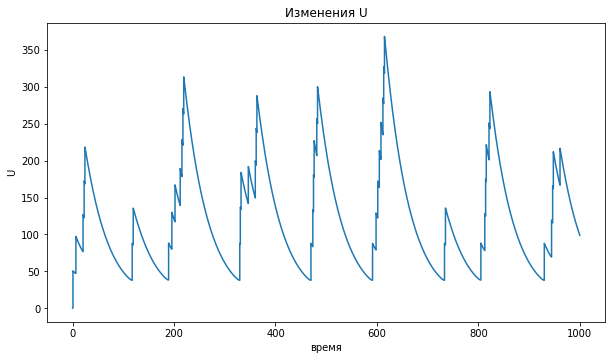

In [10]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -45
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0*2
h=0.01
prop = ode(system)
prop.set_integrator('dop853')
#prop.set_integrator("dopri5" )
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

prop.set_initial_value(s0, t0)
v_u = np.array([prop.y])
t_values = [0.0]
t_down = []
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    #print(prop.y)
    if(prop.y[0]>=vpeak):
        v_u[-1][0] = vpeak
        prop.set_initial_value([m, prop.y[1]+n], prop.t)
        if(prop.t>100):
            t_down.append(prop.t)
    
    m = m+0.2*np.sin(prop.t)
    v_u = np.append(v_u, [prop.y ], axis = 0  )

plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,0], "-")
plt.xlabel("время")
plt.ylabel("V")

#plt.plot(t_down, [m for i in range(len(t_down))], "o", c= "k")
plt.title("Изменения мембранного потенациала")

plt.figure(figsize=(10,5.5))
plt.plot(v_u[100:,0], v_u[100:,1], "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")


plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,1], "-")
plt.xlabel("время")
plt.ylabel("U")
plt.title("Изменения U")
